In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #untuk plotting data
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.__version__

'1.2.4'

In [18]:
pd.read_csv("heart.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Attribute information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar >120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise include angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flouroscopy
13. thal
    3 = normal; 
    6 = fixed defect:
    7 = reversible defect

In [19]:
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

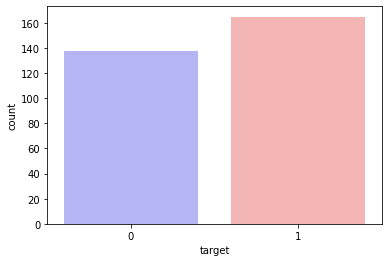

In [20]:
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()

In [21]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Persentase Pasien tidak Sakit Jantung: {:.2f}%". format((countNoDisease / (len(hd.target))*100)))
print("Persentase Pasien Sakit Jantung: {:.2f}%". format((countHaveDisease / (len(hd.target))*100)))

Persentase Pasien tidak Sakit Jantung: 45.54%
Persentase Pasien Sakit Jantung: 54.46%


<function matplotlib.pyplot.show(close=None, block=None)>

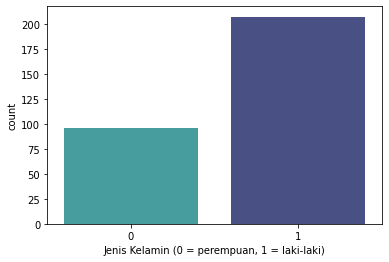

In [24]:
sns.countplot(x='sex', data=hd, palette="mako_r")
plt.xlabel("Jenis Kelamin (0 = perempuan, 1 = laki-laki)")
plt.show

In [25]:
countFemale = len(hd[hd.sex == 0])
countMale = len(hd[hd.sex == 1])
print("Persentase Pasien Perempuan: {:.2f}%".format((countFemale / (len(hd.sex))*100)))
print("Persentase Pasien Laki-Laki: {:.2f}%".format((countMale / (len(hd.sex))*100)))

Persentase Pasien Perempuan: 31.68%
Persentase Pasien Laki-Laki: 68.32%


In [26]:
hd.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


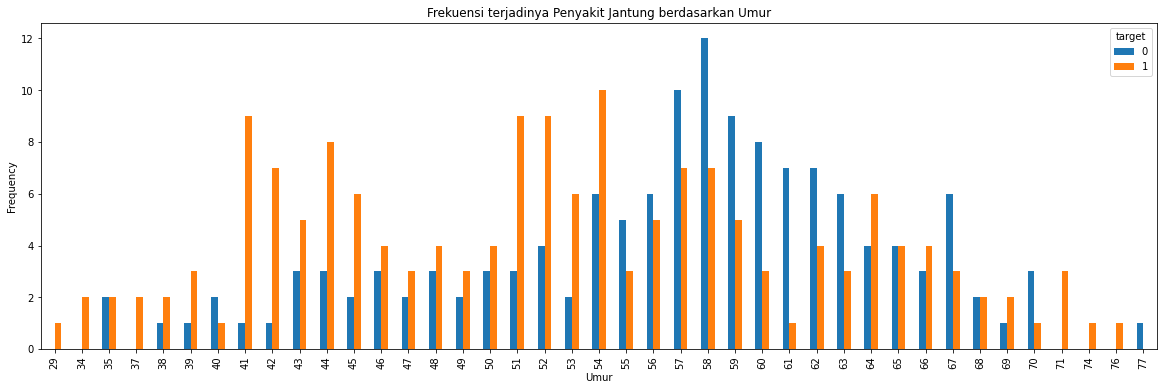

In [30]:
pd.crosstab(hd.age,hd.target).plot(kind="bar", figsize=(20,6))
plt.title('Frekuensi terjadinya Penyakit Jantung berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseANdAge.png')
plt.show()

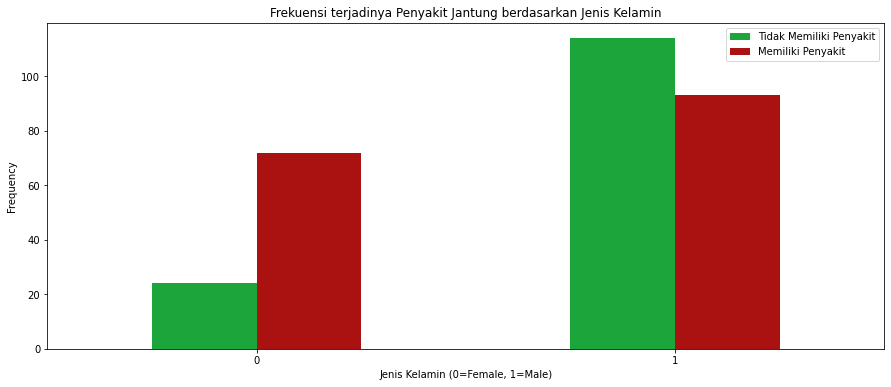

In [31]:
pd.crosstab(hd.sex,hd.target).plot(kind="bar", figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Frekuensi terjadinya Penyakit Jantung berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0=Female, 1=Male)')
plt.xticks(rotation=0)
plt.legend(["Tidak Memiliki Penyakit", "Memiliki Penyakit"])
plt.ylabel('Frequency')
plt.show()

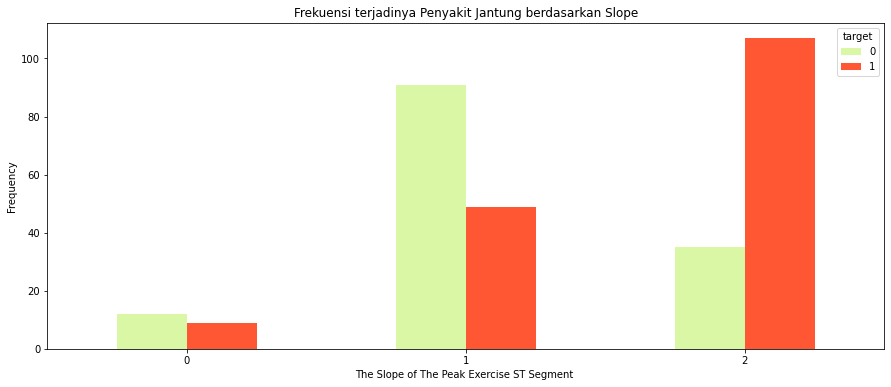

In [32]:
pd.crosstab(hd.slope,hd.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Frekuensi terjadinya Penyakit Jantung berdasarkan Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

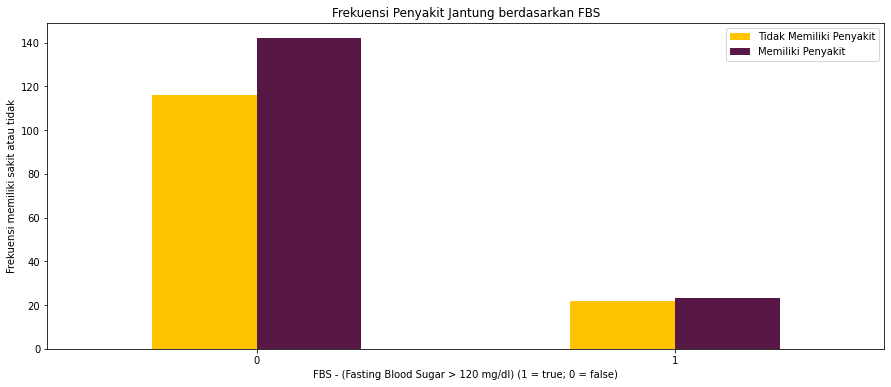

In [33]:
pd.crosstab(hd.fbs,hd.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Memiliki Penyakit", "Memiliki Penyakit"])
plt.ylabel('Frekuensi memiliki penyakit atau tidak')
plt.show()

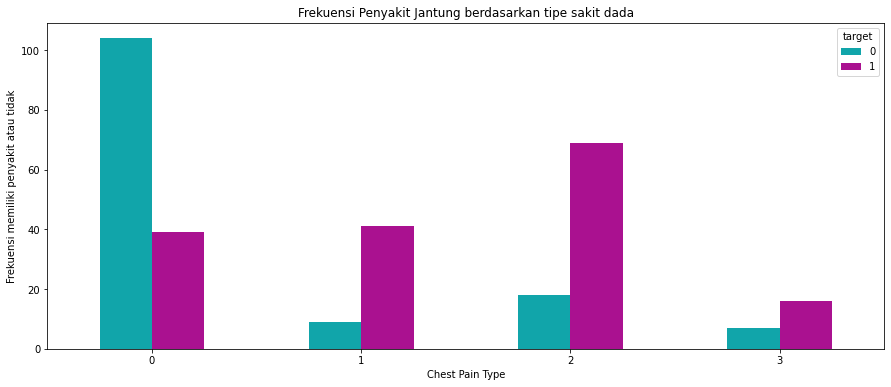

In [35]:
pd.crosstab(hd.cp,hd.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Frekuensi Penyakit Jantung berdasarkan tipe sakit dada')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi memiliki penyakit atau tidak')
plt.show()

In [38]:
a = pd.get_dummies(hd['cp'],prefix="cp")
b = pd.get_dummies(hd['thal'],prefix="thal")
c = pd.get_dummies(hd['slope'],prefix="slope")

In [40]:
frames = [hd, a, b, c]
hd = pd.concat(frames, axis=1)
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [42]:
hd = hd.drop(columns=['cp','thal','slope'])
hd.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


LOGISTIC REGRESSION

In [57]:
y=hd.target.values
x_data=hd.drop(['target'], axis=1)

NORMALIZE DATA

In [58]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

INITIALIZE

In [61]:
def initialize(dimension):
    weight=np.full((dimension,1),0.1)
    bias=0.0
    return weight,bias

SKLEARN LOGISTIC REGRESSION

In [63]:
accuracies={}

lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc=lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression']=acc
print("Tes Keakuratan {:.2f}%".format(acc))

Tes Keakuratan 86.89%


K-NEAREST NEIGHBORS (KKN) CLASSIFICATION

Nilai KNN Maksimal 88.52%


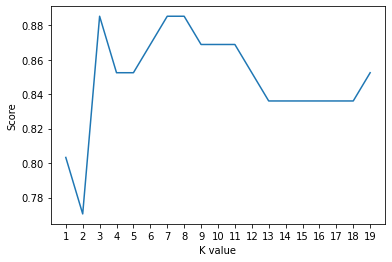

In [72]:
scoreList=[]
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show

acc=max(scoreList)*100
accuracies['KNN']=acc
print("Nilai KNN Maksimal {:.2f}%".format(acc))

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
prediction=knn.predict(x_test.T)

print("{} Nilai NN: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 Nilai NN: 77.05%


SUPPORT VECTOR MACHINE (SVM) ALGORITHM

In [74]:
from sklearn.svm import SVC

In [76]:
svm = SVC(random_state=1)
svm.fit(x_train.T, y_train.T)

acc=svm.score(x_test.T, y_test.T)*100
accuracies['SVM']=acc
print("Tes Keakuratan dari Algoritma SVM: {:.2f}%".format(acc))

Test Keakuratan dari Algoritma SVM: 88.52%


DECISION TREE ALGORITHM

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Tes Keakuratan Decision Tree {:.2f}%".format(acc))

Tes Keakuratan Decision Tree 77.05%


RANDOM FOREST CLASSIFICATION

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Nilai Keakuratan Algoritma Random Forest : {:.2f}%".format(acc))

Nilai Keakuratan Algoritma Random Forest : 88.52%


NAIVE BAYES ALGORITHM

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Keakuratan dari Naive Bayes: {:.2f}%".format(acc))

Keakuratan dari Naive Bayes: 86.89%


CONFUSION MATRIX

In [81]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [82]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

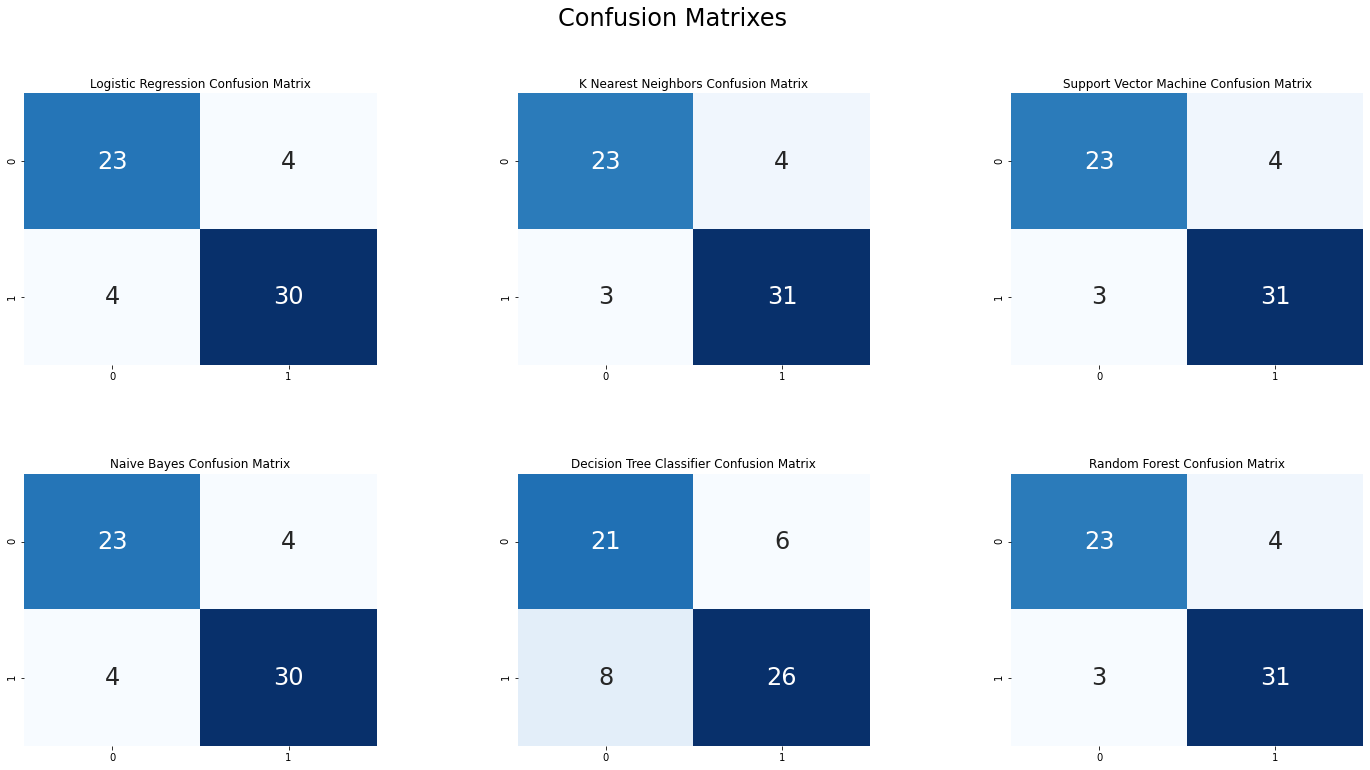

In [83]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Terimakasih dan tolong koreksinya, saya masih harus banyak belajar:))